# Learning Gate - Reto 
### Predicción de Contingencias Ambientales en el Área Metropolitana de la Ciudad de Monterrey

## Data Science Fundamentals - Tensorflow

## Introducción  

Actualmente la industria, gobierno y organizaciones tienen la necesidad de generar modelos inteligentes para diversos propósitos. En este caso en particular, ayudarás a proteger al mundo desarrollando el modelo que mejor funcione para integrarlo al sistema de seguridad y poder detectar intrusos y ataques dentro del perímetro de una base que desarrolla una vacuna para curar la plaga zombi que atormenta al mundo. 

Trabajarás con una base de datos que contiene 8530 imágenes de diferentes dimensiones de 6 clases diferentes: misil, jet, helicóptero, dron, cohete y avión en formatos jpeg, jpg, png, entre otros. Por lo tanto, tendrás que encargarte de preparar la base de datos de imágenes para poder generar los modelos que se requieren. 

## Objetivos

El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando los siguientes pasos:

- Preparar una base de datos y generar los conjuntos de entrenamiento y prueba
- Diseñar un modelo utilizando una red neuronal convolucional desde cero y determinar sus hiperparámetros
- Diseñar un modelo utilizando una red neuronal convolucional utilizando un modelo pre-entrenado
- Generar un modelo utilizando la herramienta Teachable Machine
- Validar, evaluar y comparar los tres diferentes modelos generados y seleccionar el mejor considerando la exactitud como indicador de desempeño
- Exportar los modelos generados para poder utilizarlos dentro de Colab o algún otro destino. 

## Defining Custom Functions and Importing Libraries

### Importing Libraries

In [1]:
import os, glob, pathlib, PIL, random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import ImageFile  
import imghdr
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image                  
from tqdm import tqdm
from sklearn.datasets import load_files  
from glob import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

### Custom Functions

In [2]:
# Defining global variables
alto_img = 224
ancho_img = 224

np.random.seed(42) 
random.seed(42) 
tf.random.set_seed(42) 

# Defining functions

def imagen_valida(archivo,extensiones=[".jpg", "bmp", "gif", "jpeg", "png"]):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    es_archivo = os.path.isfile(archivo)
    es_imagen = ext_archivo.lower() in extensiones
    return es_archivo and es_imagen


def construir_base_datos(etiqueta, DIR):
    counters = [0, 0]
    for i, archivo in enumerate(tqdm(os.listdir(DIR))):
        ruta = os.path.join(DIR,archivo)
        if ((imagen_valida(ruta))):# & (i%2)==0):
            counters[1] = counters[1]+1
            img = tf.keras.preprocessing.image.load_img(ruta,color_mode='rgb')
            matriz_img = tf.keras.preprocessing.image.img_to_array(img)
            matriz_img = tf.image.resize(matriz_img/255,[alto_img,ancho_img])
            Imagenes.append(matriz_img.numpy())
            Etiquetas.append(etiqueta)
        else:
            counters[0] = counters[0]+1
    print('Summary for the analysis of images within the {} folder: '.format(DIR.split('\\')[-1]))
    print('Number of discarted images due to incompatibilities: ', counters[0])
    print('Number of valid images: ', counters[1], '\n')

    
def ImageGenerator(NumberOfImages, img_entrenamiento, etq_entrenamiento, alto_img,ancho_img):
    
    x_train_augmented = np.ndarray(shape=(NumberOfImages*len(set(etq_entrenamiento)), 
                                   img_entrenamiento.shape[1], img_entrenamiento.shape[2], img_entrenamiento.shape[3]))
    x_train_labels = np.ndarray(shape=(NumberOfImages*len(set(etq_entrenamiento)),))

    for i, clase in enumerate(list(set(etq_entrenamiento))):

        # Genariting and array to randomly select images to be augmented
        idxs = np.where(etq_entrenamiento == clase)
        idxs_rnd = np.random.choice(idxs[0], size=NumberOfImages, replace=True)
        dataSel = img_entrenamiento[idxs_rnd, :,:,:]

        # Creating an ImageDataGenerator, to create augmented images
        datagen_reg = ImageDataGenerator( width_shift_range=0.15,  # randomly shift images horizontally (35% of total width)
                                          height_shift_range=0.15,  # randomly shift images vertically (35% of total height)
                                          rotation_range=25,    #Range to rotate the images
                                          horizontal_flip=True) # randomly flip images horizontally

        # Training the genator of augmented images based on the selceted images
        datagen_reg.fit(dataSel)
        # Creating a numpy array to store the augmented images
        x_train_regH = np.ndarray(shape=(NumberOfImages,alto_img,ancho_img,3))

        # Genreating the augmented images
        for x_batch in datagen_reg.flow(dataSel, batch_size=NumberOfImages):
            for n in range(NumberOfImages):
                x_train_augmented[(i*NumberOfImages)+n,:,:,:]=x_batch[n]
                x_train_labels[(i*NumberOfImages)+n] = clase
            break;   

    # Combining the agumetned images with the training dataset to created AI model that can generalize better
    img_entrenamiento = np.concatenate((img_entrenamiento, x_train_augmented))
    etq_entrenamiento = np.concatenate((etq_entrenamiento, x_train_labels))
    
    return img_entrenamiento, etq_entrenamiento

## Defining Datasets for training Tensorflow Models

### Creating the Database

In [3]:
path = os.path.join(os.getcwd(), 'Data', 'Challenge', 'objetos')
DIR_BASE = pathlib.Path(path)
conteo_img = len(list(DIR_BASE.glob('*/*')))
print('Total of images composing the database: ', conteo_img, '\n')

Imagenes=[]
Etiquetas=[]
for i, folder in enumerate(os.listdir(path)):
    DIR_Folder = os.path.join(os.getcwd(), 'Data', 'Challenge', 'objetos', folder)
    construir_base_datos(i, DIR_Folder)

  0%|                                                                                         | 0/1375 [00:00<?, ?it/s]

Total of images composing the database:  8246 



  1%|▍                                                                                | 7/1144 [00:00<00:17, 64.57it/s]

Summary for the analysis of images within the avion folder: 
Number of discarted images due to incompatibilities:  123
Number of valid images:  1252 



  0%|▎                                                                                | 4/1291 [00:00<00:40, 32.17it/s]

Summary for the analysis of images within the cohete folder: 
Number of discarted images due to incompatibilities:  95
Number of valid images:  1049 



  1%|▌                                                                                | 9/1335 [00:00<00:21, 62.97it/s]

Summary for the analysis of images within the dron folder: 
Number of discarted images due to incompatibilities:  190
Number of valid images:  1101 



  0%|                                                                                         | 0/1801 [00:00<?, ?it/s]

Summary for the analysis of images within the helicoptero folder: 
Number of discarted images due to incompatibilities:  138
Number of valid images:  1197 



  1%|▋                                                                               | 11/1300 [00:00<00:13, 92.11it/s]

Summary for the analysis of images within the jet folder: 
Number of discarted images due to incompatibilities:  176
Number of valid images:  1625 



Summary for the analysis of images within the misil folder: 
Number of discarted images due to incompatibilities:  104
Number of valid images:  1196 



### Generating the Training, Validations and Test Datasets

In [4]:
img_entrenamiento, img_prueba, etq_entrenamiento, etq_prueba =train_test_split(np.array(Imagenes), 
                                                                               np.array(Etiquetas), 
                                                                               test_size=0.2, 
                                                                               stratify=None,
                                                                               random_state=42)

print('Training Dataset summary: ', img_entrenamiento.shape)
#print('Validation Dataset summary: ', img_val.shape)
print('Testing summary: ', img_prueba.shape)

del Imagenes, Etiquetas

Training Dataset summary:  (5936, 224, 224, 3)
Testing summary:  (1484, 224, 224, 3)


### Saving the Training Dataset to be used in the Teachable Machine Website

In [5]:
count = 0
for n in range(img_entrenamiento.shape[0]):
    path2folder = os.path.join(os.getcwd(), 'Data', 'TrainingData', os.listdir(path)[etq_entrenamiento[n]], 'image00'+str(count)+'.jpeg')
    numpyarray = img_entrenamiento[n,:,:,:]*255
    numpyarray = numpyarray.astype(np.uint8)
    im = PIL.Image.fromarray(numpyarray)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    im.save(path2folder)
    count += 1 

### Generating Augmented Images

In [42]:
print('Before Images Augmentation')
print('Training Dataset size, images: ', img_entrenamiento.shape)
print('Training Dataset size, labels: ', etq_entrenamiento.shape)

NumberOfImages = 50
img_entrenamiento, etq_entrenamiento = ImageGenerator(NumberOfImages, img_entrenamiento, etq_entrenamiento, alto_img,ancho_img)

print('\n After Images Augmentation')
print('Training Dataset size, images: ', img_entrenamiento.shape)
print('Training Dataset size, labels: ', etq_entrenamiento.shape)

Before Images Augmentation
Training Dataset size, images:  (5936, 224, 224, 3)
Training Dataset size, labels:  (5936,)

 After Images Augmentation
Training Dataset size, images:  (7736, 224, 224, 3)
Training Dataset size, labels:  (7736,)


#### Visualizing Examples of Generated Augmented Images

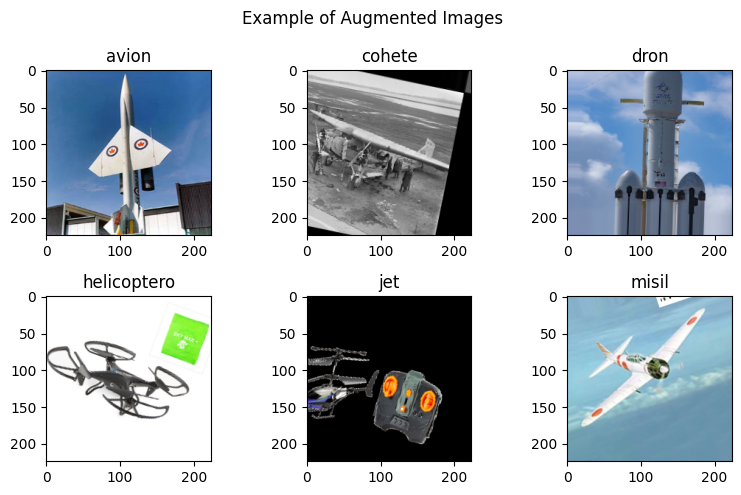

In [6]:
# Visualizing a subset of original dog images
fig = plt.figure(figsize=(8,5))
fig.suptitle('Example of Augmented Images', fontsize=12);

for i in range(len(set(etq_entrenamiento))):
    ax = fig.add_subplot(2, 3, i+1)
    img = img_entrenamiento[(img_entrenamiento.shape[0]-NumberOfImages*len(set(etq_entrenamiento))-1)+(NumberOfImages*i),:,:,:]
    ax.imshow(img)
    ax.set_title(os.listdir(path)[int(etq_entrenamiento[(img_entrenamiento.shape[0]-NumberOfImages*len(set(etq_entrenamiento)))+(NumberOfImages*i)])])
fig.tight_layout()    


## Training Tensorflow Images Classifiers

### Model Created from Scratch

#### Defining the Model Architecture

In [7]:
model = Sequential([

### TODO: Define your architecture.
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='Same', input_shape=(alto_img,ancho_img,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

#### Compiling, Saving and Training the Model

In [8]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='saved_models/weights.best.CustomCNNs.hdf5', 
                               verbose=1, save_best_only=True)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
evolucion = model.fit(img_entrenamiento, etq_entrenamiento,validation_data=(img_prueba, etq_prueba), 
                      callbacks=[checkpointer], epochs=20,batch_size=10)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 1.7878 - accuracy: 0.2130
Epoch 1: val_loss improved from inf to 1.78432, saving model to saved_models\weights.best.CustomCNNs.hdf5
624/624 [==============================] - 16s 18ms/step - loss: 1.7878 - accuracy: 0.2130 - val_loss: 1.7843 - val_accuracy: 0.2102
Epoch 2/20
621/624 [============================>.] - ETA: 0s - loss: 1.7837 - accuracy: 0.2169
Epoch 2: val_loss improved from 1.78432 to 1.78362, saving model to saved_models\weights.best.CustomCNNs.hdf5
624/624 [==============================] - 10s 16ms/step - loss: 1.7841 - accuracy: 0.2171 - val_loss: 1.7836 - val_accuracy: 0.2102
Epoch 3/20
624/624 [==============================] - ETA: 0s - loss: 1.7812 - accuracy: 0.2210
Epoch 3: val_loss improved from 1.78362 to 1.77283, saving model to saved_models\weights.best.CustomCNNs.hdf5
624/624 [==============================] - 10s 16ms/step - loss: 1.7812 - accuracy: 0.2210 - val_loss: 1.7728 - val_accu

- ***Saving Model***

In [9]:
model.save("Tema5/saved_models/best.CustomCNNs.h5")

#### Analyzing the Model Learning Curves

- ***Gathering of the Learning Curves Data***

In [11]:
exactitud = evolucion.history['accuracy']
exactitud_val = evolucion.history['val_accuracy']

perdida = evolucion.history['loss']
perdida_val = evolucion.history['val_loss']

rango_epoca = SD

- ***Plotting the Learning Curves***

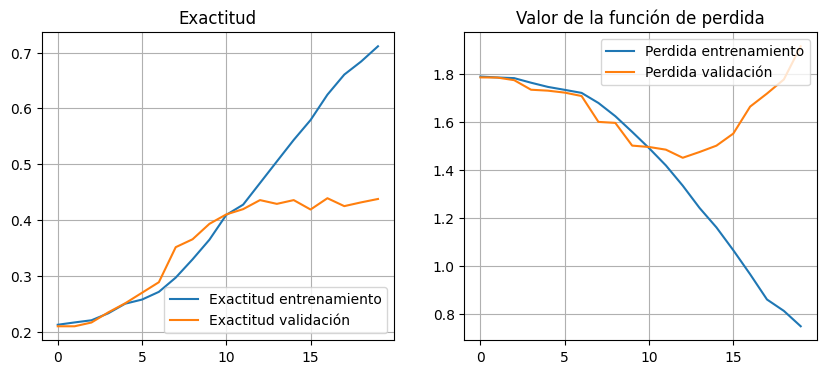

In [12]:
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento') 
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación') 
plt.legend(loc='lower right') 
plt.title('Exactitud') 
plt.grid()

plt.subplot(1, 2, 2) 
plt.plot(rango_epoca, perdida, label='Perdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Perdida validación') 
plt.legend(loc='upper right') 
plt.title('Valor de la función de perdida') 
plt.grid() 

#### Predictions

- ***Loading the Model with the Best Validation Loss***

In [13]:
model = Sequential([

### TODO: Define your architecture.
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='Same', input_shape=(alto_img,ancho_img,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.summary()

model.load_weights('saved_models/weights.best.CustomCNNs.hdf5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)      

- ***Making Predictions***

In [14]:
# get index of predicted dog breed for each image in test set
classes_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in img_prueba]

# report test accuracy
test_accuracy = 100*np.sum(np.array(classes_predictions)==(etq_prueba))/len(classes_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 43.5984%


### Model Created using Transfer Learning

#### Increasing the Number of Augmented Images to Reduce Overfitting

In [5]:
print('Before Images Augmentation')
print('Training Dataset size, images: ', img_entrenamiento.shape)
print('Training Dataset size, labels: ', etq_entrenamiento.shape)

NumberOfImages = 300
img_entrenamiento, etq_entrenamiento = ImageGenerator(NumberOfImages, img_entrenamiento, etq_entrenamiento, alto_img,ancho_img)

print('\n After Images Augmentation')
print('Training Dataset size, images: ', img_entrenamiento.shape)
print('Training Dataset size, labels: ', etq_entrenamiento.shape)

Before Images Augmentation
Training Dataset size, images:  (5936, 224, 224, 3)
Training Dataset size, labels:  (5936,)

 After Images Augmentation
Training Dataset size, images:  (7736, 224, 224, 3)
Training Dataset size, labels:  (7736,)


#### Defining the Model Architecture

- ***Loading the Pretrained Model - MobileNetV2***

In [6]:
FORMA_IMG = (224,224,3)
modelo_base = tf.keras.applications.MobileNetV2(
    input_shape=FORMA_IMG,
    include_top=False,
    weights='imagenet')

modelo_base.trainable = False

- ***Creating Complementary Layers***

In [7]:
capa_normalizacion = tf.keras.layers.experimental.preprocessing.Rescaling(1./1,input_shape=FORMA_IMG)
capa_prom_global = tf.keras.layers.GlobalAveragePooling2D()
capa_tmp1 = tf.keras.layers.Dense(300, activation='relu')
capa_tmp2 = tf.keras.layers.Dropout(.4)
capa_tmp3 = tf.keras.layers.Dense(128, activation='relu')
capa_tmp4 = tf.keras.layers.Dropout(.3)
capa_prediccion = tf.keras.layers.Dense(6,activation='softmax')

- ***Generating the Model***

In [8]:
modelo_final = tf.keras.Sequential([capa_normalizacion,
                                    modelo_base,
                                    capa_prom_global,
                                    capa_tmp1,
                                    capa_tmp2,
                                    capa_tmp3,
                                    capa_tmp4,
                                    capa_prediccion]) 

modelo_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 300)               384300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

#### Compiling, Saving and Training the Model

In [9]:
tasa_aprendizaje_base = 0.0001 
modelo_final.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = tasa_aprendizaje_base), 
                     loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='saved_models/weights.best.MobileNetV2.hdf5', 
                               verbose=1, save_best_only=True)

evolucion = modelo_final.fit(img_entrenamiento, etq_entrenamiento,validation_data=(img_prueba, etq_prueba), 
                             callbacks=[checkpointer], epochs=20,batch_size=5)

Epoch 1/20
1548/1548 [==============================] - ETA: 0s - loss: 1.4390 - accuracy: 0.4443
Epoch 1: val_loss improved from inf to 1.01684, saving model to saved_models\weights.best.MobileNetV2.hdf5
1548/1548 [==============================] - 30s 15ms/step - loss: 1.4390 - accuracy: 0.4443 - val_loss: 1.0168 - val_accuracy: 0.6435
Epoch 2/20
1548/1548 [==============================] - ETA: 0s - loss: 1.1294 - accuracy: 0.5706
Epoch 2: val_loss improved from 1.01684 to 0.95310, saving model to saved_models\weights.best.MobileNetV2.hdf5
1548/1548 [==============================] - 22s 14ms/step - loss: 1.1294 - accuracy: 0.5706 - val_loss: 0.9531 - val_accuracy: 0.6482
Epoch 3/20
1545/1548 [============================>.] - ETA: 0s - loss: 1.0196 - accuracy: 0.6267
Epoch 3: val_loss improved from 0.95310 to 0.93397, saving model to saved_models\weights.best.MobileNetV2.hdf5
1548/1548 [==============================] - 22s 14ms/step - loss: 1.0197 - accuracy: 0.6266 - val_loss: 0.

- ***Saving Model***

In [16]:
modelo_final.save("Tema5/saved_models/best.MobileNetV2.h5")

#### Analyzing the Model Learning Curves

- ***Gathering of the Learning Curves Data***

In [10]:
exactitud = evolucion.history['accuracy']
exactitud_val = evolucion.history['val_accuracy']

perdida = evolucion.history['loss']
perdida_val = evolucion.history['val_loss']

rango_epoca = range(len(exactitud))

- ***Plotting the Learning Curves***

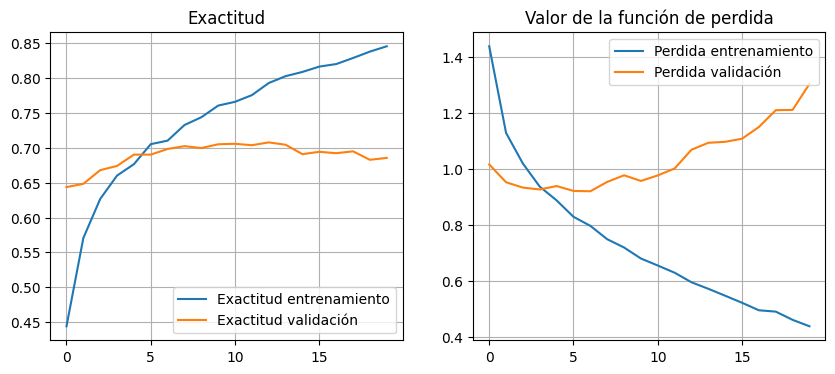

In [11]:
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(rango_epoca, exactitud, label='Exactitud entrenamiento') 
plt.plot(rango_epoca, exactitud_val, label='Exactitud validación') 
plt.legend(loc='lower right') 
plt.title('Exactitud') 
plt.grid()

plt.subplot(1, 2, 2) 
plt.plot(rango_epoca, perdida, label='Perdida entrenamiento')
plt.plot(rango_epoca, perdida_val, label='Perdida validación') 
plt.legend(loc='upper right') 
plt.title('Valor de la función de perdida') 
plt.grid() 

#### Predictions

- ***Loading the Model with the Best Validation Loss***

In [12]:
modelo_final = tf.keras.Sequential([capa_normalizacion,
                                    modelo_base,
                                    capa_prom_global,
                                    capa_tmp1,
                                    capa_tmp2,
                                    capa_tmp3,
                                    capa_tmp4,
                                    capa_prediccion]) 

modelo_final.summary()

modelo_final.load_weights('saved_models/weights.best.MobileNetV2.hdf5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 300)               384300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 128)              

- ***Making Predictions***

In [13]:
# get index of predicted dog breed for each image in test set
classes_predictions = [np.argmax(modelo_final.predict(np.expand_dims(tensor, axis=0))) for tensor in img_prueba]

# report test accuracy
test_accuracy = 100*np.sum(np.array(classes_predictions)==(etq_prueba))/len(classes_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 69.8113%


### Model Created from the Teachable Machine Webpage

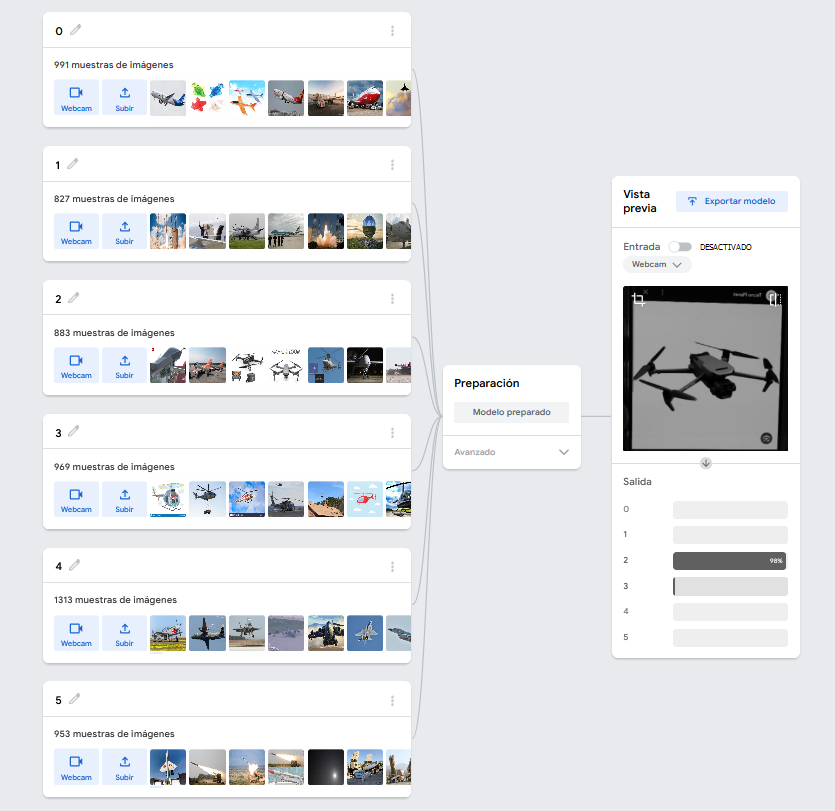

#### Loading Trained Model

In [6]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Defining path where models were saved
path = os.path.join(os.getcwd(), 'Tema5', 'TeachableMachine')

# Load the model
model = load_model(os.path.join(path, "keras_Model.h5"), compile=False)

# Load the labels
class_names = open(os.path.join(path, "labels.txt"), "r").readlines()

#### Evaluating the Teachable Machine Trained Model

In [28]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1

predictions = []
for n in range(img_prueba.shape[0]):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    # Normalize the image
    normalized_image_array = ((img_prueba[n, :, :, :].astype(np.float32)*255) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predicts the model
    prediction = model.predict(data)
    predictions.append(np.argmax(prediction))

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==(etq_prueba))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 58.9623%


### Conclusions

It can be concluded that the three learning models are not yet suitable for deployment as reliable solutions. However, there is a significant difference in the accuracy of the trained models. The model leveraging transfer learning outperforms the others with approximately 70% accuracy. On the other hand, the model trained from scratch is the least reliable, showing clear signs of overfitting. This issue persisted despite efforts to mitigate it by adding augmented images and dropout layers to reduce bias in the training dataset. Additionally, the model trained using the Teachable Machine webpage performed better than the basic model but not as well as the transfer learning-based model.

It's important to note that the Teachable Machine model was generated using the default settings provided by the platform. It is likely that with more advanced configurations, a more accurate model could be developed, yielding better classification of the target classes. Furthermore, the models trained in this notebook were constrained by the available local resources, specifically an Nvidia RTX 3700i with 8GB of memory. With access to more computational power, it would be possible to develop more robust models.

# FIN